##### **7 CNN (Convolutional Neural Network)**

**Fully connected Layer (FC Layer)**

- 인접하는 계층의 모든 뉴런이 결합.
- 단점 : 데이터의 형상이 무시된다.
    - 즉, 3차원 데이터(RGB)를 1차원 데이터(한 줄)로 만들면서 공간적 정보가 무시된다.


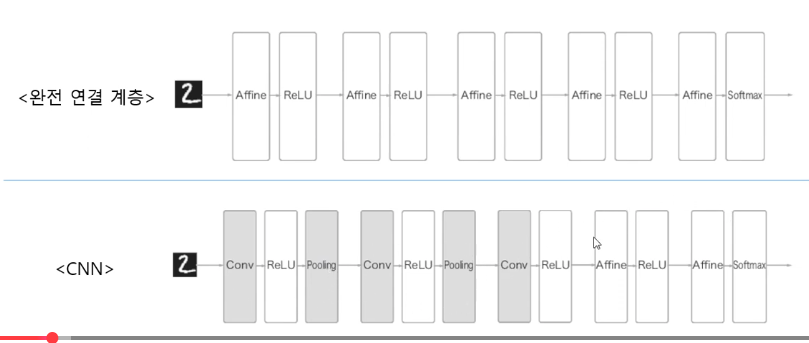

In [2]:
from IPython.display import Image, display
display(Image(filename='images/1.png', embed=True))


CNN은 FC Layer(Affine)를 대신해서 
<br> **Convolutional Layer**와 **Pooling Layer**가 사용된다.


**Conv Layer (합성곱 계층)**

- 입력 데이터에 필터를 적용하는 것
    - 입력과 필터(=kernel)에서 대응하는 원소끼리 곱하여 총 합을 구함
        - FMA (fused multiplay-add, 단일 곱셈-누산)
    - filter의 window가 이동하면서 수행
- 합성곱 연산의 편향
    - 항상 1x1만 존재

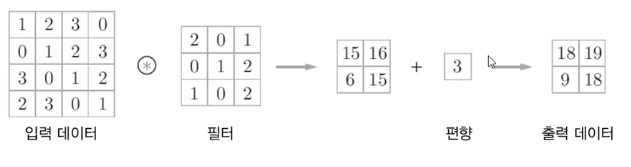

In [4]:
from IPython.display import Image, display
display(Image(filename='images/2.png', embed=True))


**Padding**

- 데이터 주변을 특정 값으로 채우는 것
- 효과 : 출력의 크기를 조정 가능

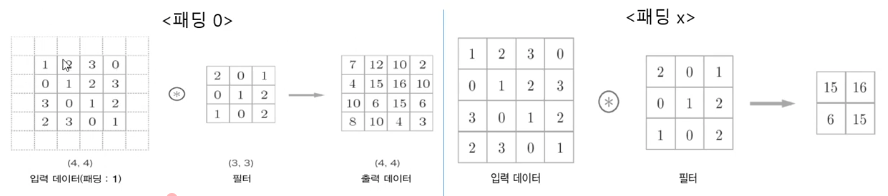

In [5]:
from IPython.display import Image, display
display(Image(filename='images/3.png', embed=True))


**Stride**

- filter를 적용(이동)하는 간격을 지정


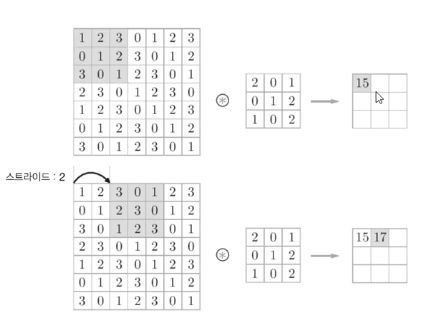

In [6]:
display(Image(filename='images/4.png', embed=True))


- 입력 크기 $(H, W)$ (height, width)
- 필터 크기 $(FH, FW)$
- 패딩 $P$
- 스트라이드를 $S$
- 출력 크기 $(OH, OW)$

$$OH = \frac{H + 2P - FH}{S} + 1$$
$$OW = \frac{W + 2P - FW}{S} + 1$$

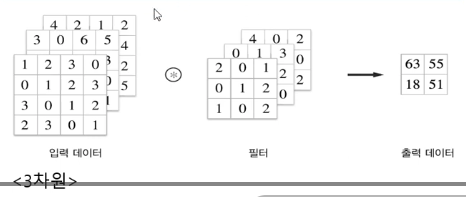

In [8]:
display(Image(filename='images/5.png', embed=True))

3차원에서는 각 차원의 데이터에 필터를 적용하고 각 데이터의 칸들끼리 총합을 구한다.

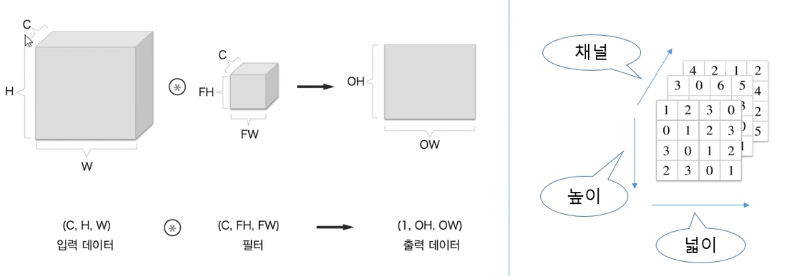

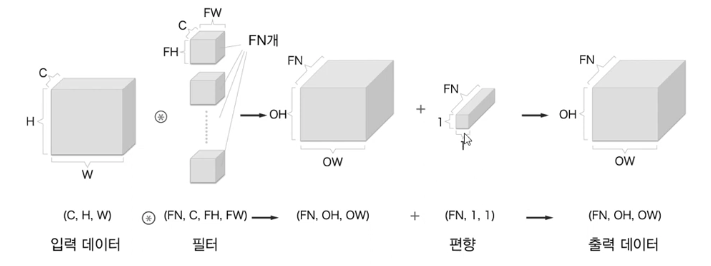

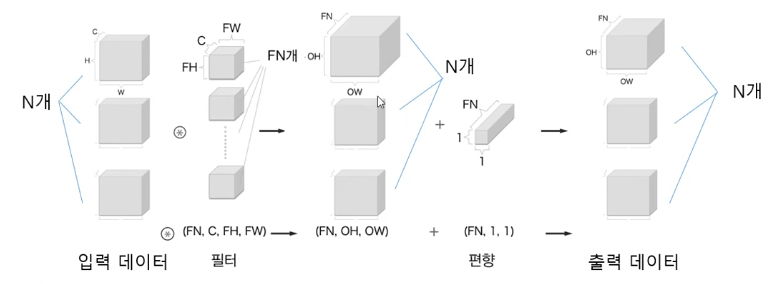

In [9]:
display(Image(filename='images/6.png', embed=True))
display(Image(filename='images/7.png', embed=True))
display(Image(filename='images/8.png', embed=True))

여러 채널(C)로 이루어진 이미지를 여러 필터에 적용하여 FN개의 데이터로 만든다. 
<br>(즉 RGB(3채널)이미지가 FN채널의 이미지로)

이렇게 하는것을 batch로 묶을 수 있다.(제일 마지막 사진)

---

**Pooling Layer**

- 가로/세로 방향의 공간을 줄이는 연산
- 특징
    - 학습해야 할 매개변수가 없다.
    - 채널 수가 변하지 않는다.
    - 입력의 변화에 영향을 적게 받는다.
- max pooling
    - 최대값만 뽑아내는 연산


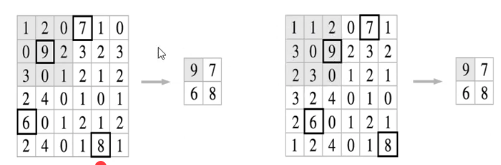

In [12]:
display(Image(filename='images/9.png', embed=True))

---

**im2col 함수**

- 입력 데이터를 가중치 계산에 용의하게 펼친다. 
    - 데이터수, 채널 수, 높이, 너비
- 장점 : 큰 행렬의 곱셈을 빠르게 계싼
- 단점 : 메모리를 많이 소비

즉, 기본 Conv layer는 window가 이동하면서 합성곱을 수행해야하는데 너무 오래걸림 ㅠ
<br>
그래서 im2col 함수를 사용해서 데이터를 1차원으로 펼침으로써 행렬곱을 빠르게 수행하도록 함.

- 입력 데이터도 가로줄로 쭈욱 펼치고, 필터도 세로줄로 쭈욱 펼쳐서 한번에 행렬곱. 
- im2col 연산의 결과가 바로 이 Feature Map이 됨.

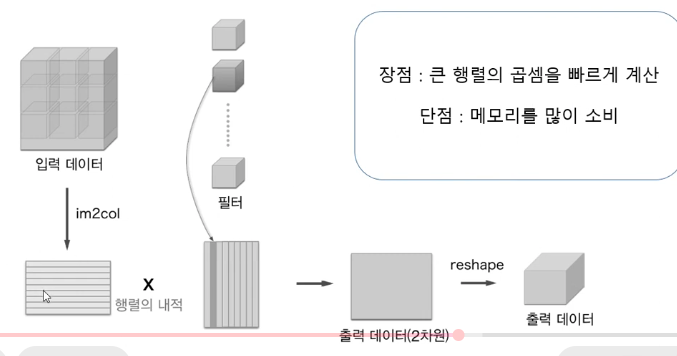

In [13]:
display(Image(filename='images/10.png', embed=True))

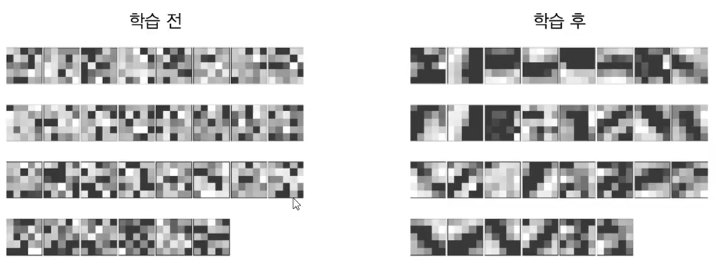

In [14]:
display(Image(filename='images/11.png', embed=True))

학습전 filter와 학습후 Filter차이

학습 후 Filter는 Edge(경계선)과 블롭(덩어리진 영역)을 볼수있다!

---
---

##### **Resnet**

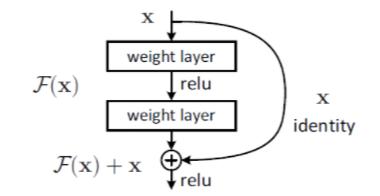

In [15]:
display(Image(filename='images/12.png', embed=True))

- 층이 깊으면 gradient vanishing 현상이 나타날 수 있다.
- 이를 해결하기 위해 skip connection을 도입.
    - 출력에 원래 입력(x)을 더해줌으로써 노드가 출력과 입력간의 잔차를 학습하게 한다.
    - 즉, 입력값 x를 여러 계층에 거쳐서 변환시킨 후, 원래 x값을 다시 더해주는 형태
- 이렇게하면 역전파 과정에서 x가 출력층으로 직접 전달되므로 기울기가 최소 1이 보장된다. (gradient vanishing 해결)

---
---

##### **R-CNN (Regions with CNN)**

이미지 내에서 물체가 있을 법한 영역들을 CNN으로 분석하겠다.
- 1. 후보영역을 추출
- 2. 후보 영역을 CNN 입력에 맞게 reshape (ex. 277x277)
- 3. CNN을 통해 특징 추출
- 4. 해당 특징이 어떤 클래스(차, 개, 사람 등)인지 분류

- 단점
    - 후보영역만큼 CNN 수행 (오래걸림)
    - 저장공간 많이 먹음


---
---

##### **RNN (Recurrent Neural Network)**

시계열 데이터나 자연어를 처리할 때 필수적인 신경망

- 메커니즘: 현재 단계($t$)의 계산에 현재의 입력($x_t$)뿐만 아니라 **이전 단계($t-1$)의 기억(Hidden State, $h_{t-1}$)**을 함께 사용

- 단점 
    - Gradient Vanishing: 역전파 과정에서 시간을 거슬러 올라가며 기울기를 곱하는데, 시퀀스가 길어지면(예: 아주 긴 문장) 앞부분의 정보가 뒷부분까지 전달되지 않고 사라집니다.

        - 이를 장기 의존성(Long-Term Dependency) 문제라고 합니다.
